## Climatic Data Analysis for January 2023

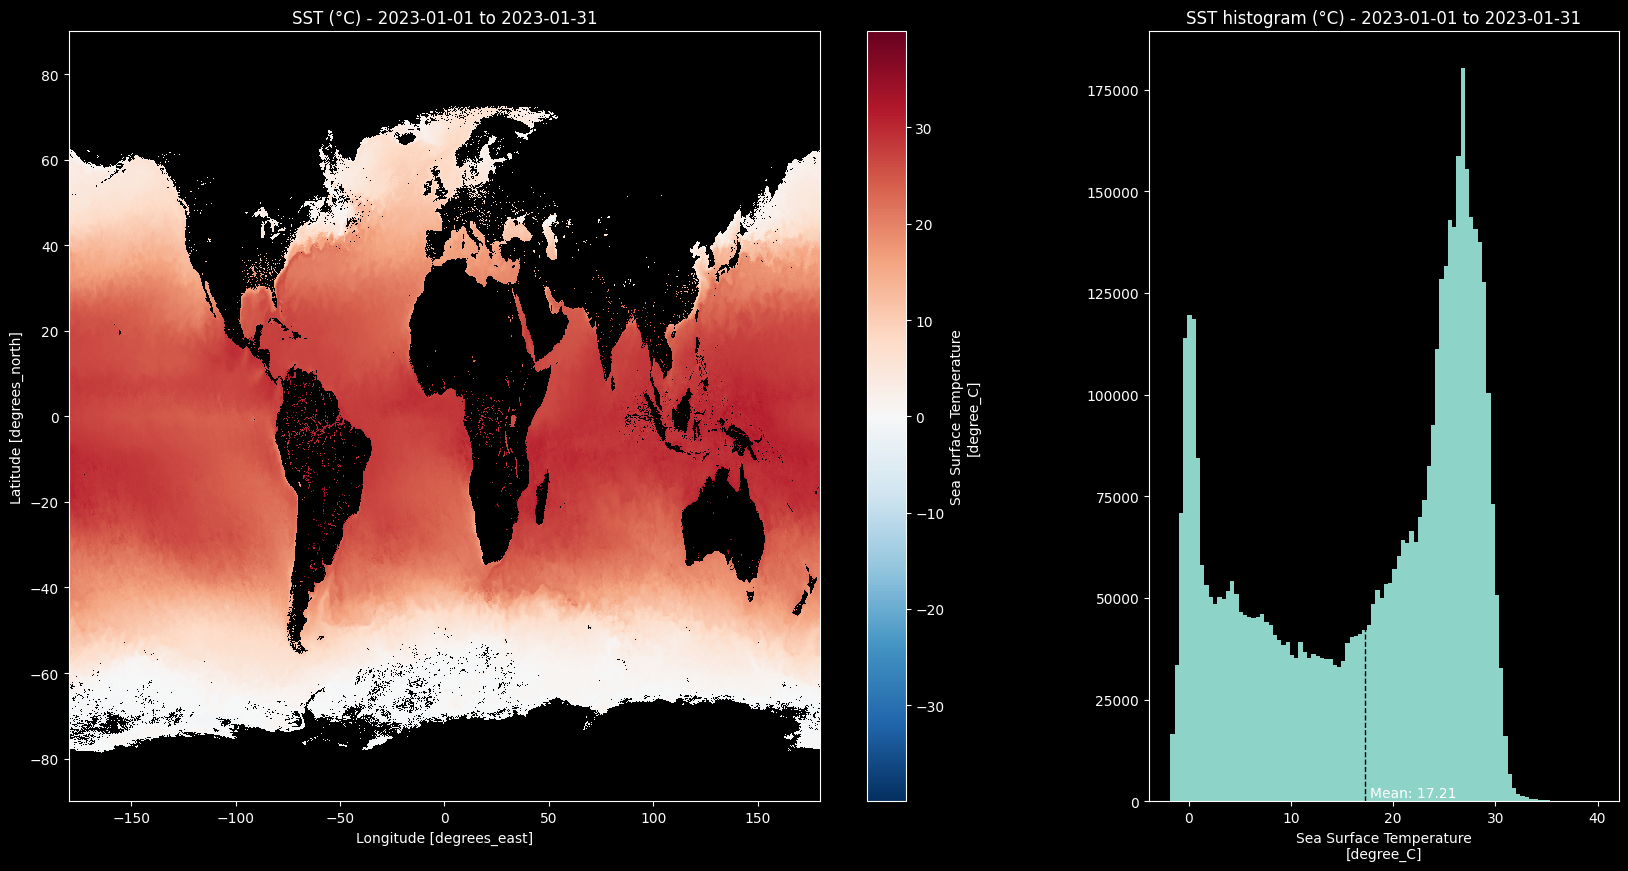

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the .nc file and load the variable
ds = xr.open_dataset('AQUA_MODIS.20230101_20230131.L3m.MO.SST.sst.9km.nc')
var = ds.sst

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [2, 1]})

# Plot the first variable on the first subplot
var.plot(ax=axs[0])
axs[0].set_title('SST (°C) - 2023-01-01 to 2023-01-31')

# Plot the variable as a line histogram on the second subplot
var.plot.hist(ax=axs[1], bins=100)
axs[1].set_title('SST histogram (°C) - 2023-01-01 to 2023-01-31')
# add an average line
axs[1].axvline(var.mean(), color='k', linestyle='dashed', linewidth=1)
# add a text that prints the average value
axs[1].text(var.mean() + 0.5, 1000, 'Mean: {:.2f}'.format(var.mean()))

# Show the plot
plt.show()

/var/folders/dk/dndvz_bs5qg4zcbp26797bxh0000gn/T/ipykernel_14009/1220599652.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sst_data = pd.read_csv('MOD_NDVI_M_2023-01-01_rgb_1440x720.SS.CSV', header=None)


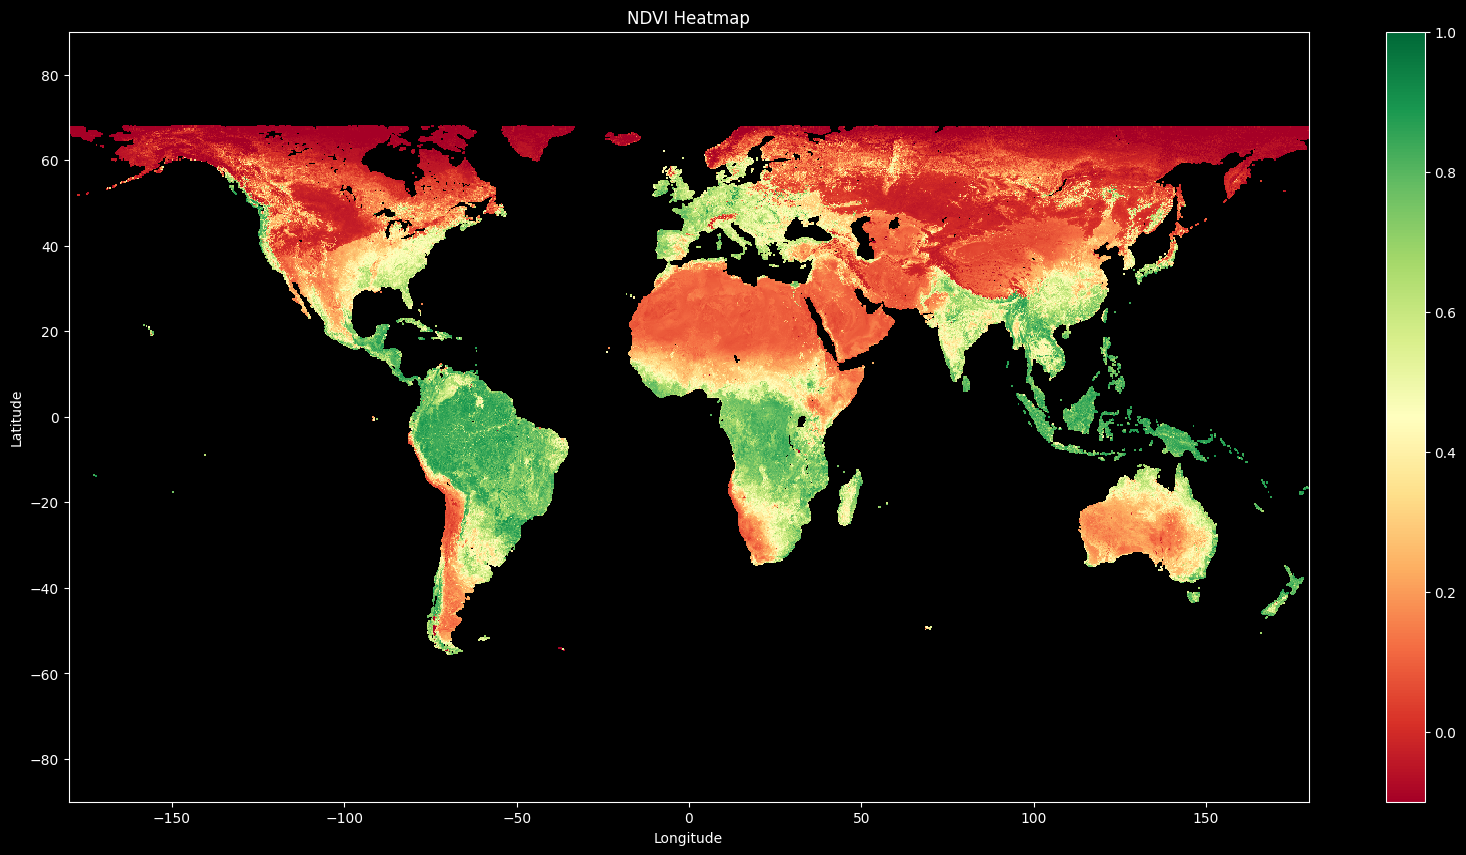

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the NDVI data
df = pd.read_csv('MOD_NDVI_M_2023-01-01_rgb_1440x720.SS.CSV')

# Load SST data
sst_data = pd.read_csv('MOD_NDVI_M_2023-01-01_rgb_1440x720.SS.CSV', header=None)
sst_values = sst_data.values

# Create a 2D array of NDVI values for the heatmap
ndvi_values = np.array(df.iloc[:, 2:])
ndvi_values = np.flipud(ndvi_values)
ndvi_values = np.ma.masked_where(ndvi_values == 99999, ndvi_values)

# Define the latitude and longitude ranges
# Generate arrays for longitude and latitude values
lon_start, lon_end, lon_step = -179.875, 179.875, 0.25
lat_start, lat_end, lat_step = -89.875, 89.875, 0.25
lon_range = np.arange(lon_start, lon_end + lon_step, lon_step)[:ndvi_values.shape[1]]
lat_range = np.arange(lat_start, lat_end + lat_step, lat_step)[:ndvi_values.shape[0]]

# Create the heatmap
plt.figure(figsize=(20, 10))
plt.pcolor(lon_range, lat_range, ndvi_values, cmap='RdYlGn', vmin=-0.1, vmax=1.0)
plt.colorbar()
plt.title('NDVI Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

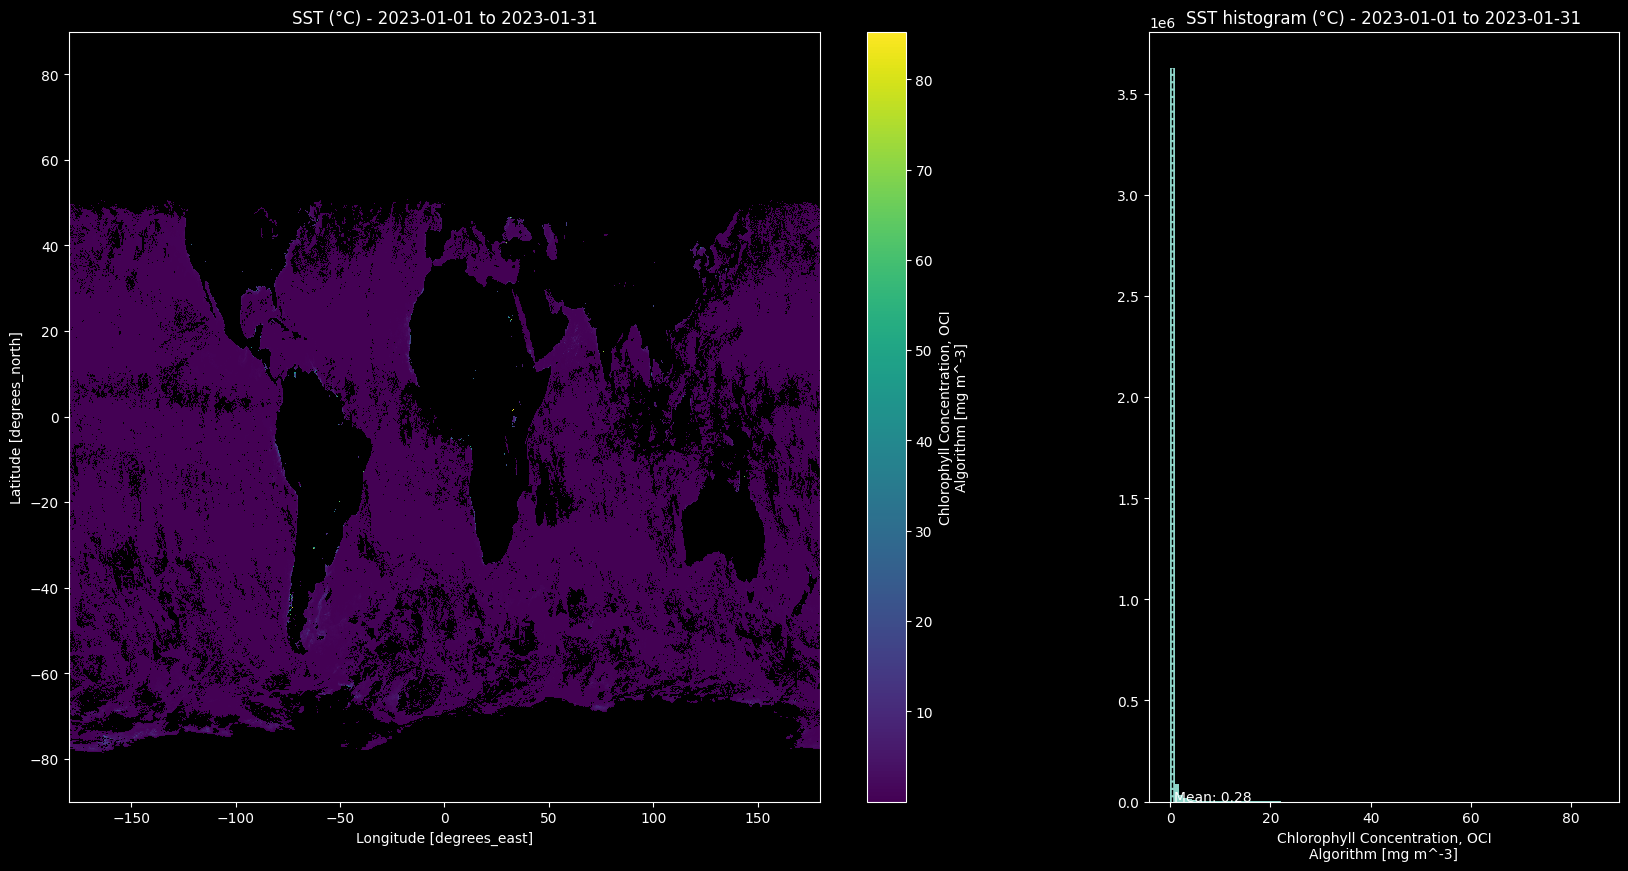

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the .nc file and load the variable
ds = xr.open_dataset('AQUA_MODIS.20230117_20230124.L3m.8D.CHL.chlor_a.9km.nc')
var = ds.chlor_a

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [2, 1]})

# Plot the first variable on the first subplot
var.plot(ax=axs[0])
axs[0].set_title('SST (°C) - 2023-01-01 to 2023-01-31')

# Plot the variable as a line histogram on the second subplot
var.plot.hist(ax=axs[1], bins=100)
axs[1].set_title('SST histogram (°C) - 2023-01-01 to 2023-01-31')
# add an average line
axs[1].axvline(var.mean(), color='k', linestyle='dashed', linewidth=1)
# add a text that prints the average value
axs[1].text(var.mean() + 0.5, 1000, 'Mean: {:.2f}'.format(var.mean()))

# Show the plot
plt.show()